# DS 2023 HW 9

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a browser, and the print the web page to PDF.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Sae-Jin Moon
- ID: rhn9qs

## Overview

<img src="https://manovich.net/content/04-projects/074-style-space/02.jpg" style="height:400px;"/>

In this assignment, you will use some pre-defined function to create visualizataions that depict works of art in the maneer of [Lev Manovich's research on style space](https://manovich.net/index.php/projects/style-space). 

Unzip the file archive attached to the Canvas assignment in the same directory as this notebook and complete the tasks.

## Compliance with Homework Submission Guidelines

1 pt

## Set Up

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.image import PIL
import colorsys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import glob

In [2]:
sns.set_style("dark")

### Read in the data

Read in the list of image file names.

In [3]:
image_files = glob.glob("turner/*.jpg")

## Tasks

### Task 1

1 pt

Verify that you can see images by running the following line of code.

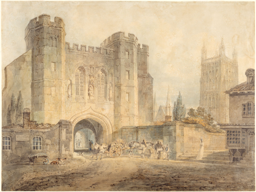

In [4]:
img_file = image_files[0]
img = PIL.Image.open(img_file)
img.thumbnail((256, 256))
img

### Task 2

1 pt

Call the function `extract_mean_hsv`, defined below, and pass it the `img` object you just created.

This function extracts the mean hue $h$, saturation $s$, and brightness $v$ from the image.

In [5]:
def extract_mean_hsv(my_img):
    pixels = my_img.getdata()
    hsv_list = [colorsys.rgb_to_hsv(*(np.array(pxl)/255.)) for pxl in pixels]
    my_hsv = pd.DataFrame(hsv_list, columns = ['h','s','v']).mean()
    return my_hsv

In [6]:
mean_hsv = extract_mean_hsv(img)
mean_hsv

h    0.099292
s    0.296063
v    0.770227
dtype: float64

### Task 3

1 pt

Which has the highest value, the hue, saturation, or brigthness?

Write your answer in the cell below, using the full word.

**Answer** 

brightness

### Task 4

1 pt

We create a data frame to store information for all the images in our list.

Notice that the data frame `IMAGES` actually contains the image object in the `img` column.

In [7]:
IMAGES = pd.DataFrame({"file_name":image_files})
IMAGES['img'] = IMAGES.file_name.apply(PIL.Image.open)
IMAGES.img.apply(lambda x: x.thumbnail((256, 256)))
IMAGES['artist'] = IMAGES.file_name.str.split("/").str[1]
IMAGES['year'] = IMAGES.file_name.str.extract(r'(\d{4})')
IMAGES = IMAGES.dropna(subset=['year'])
IMAGES.year = IMAGES.year.astype(int)

Now we apply the function we define above to the whole data frame.

In [8]:
IMAGES[['h', 's', 'v']] = IMAGES.img.apply(extract_mean_hsv)

Compute the mean brightness for the table.

In [9]:
IMAGES['v'].mean()

np.float64(0.701200372244088)

### Task 5

1 pt

Here we define a function to create scatter plots of the `IMAGE` data frame with images for each observation (painting) replacing the points.

Take the time to look out how we replace points with images in the `for` loop in the middle part of the function body.

In [10]:
def imageplot(X, c1, c2, figsize=(10,10), zoom=.25, rot=0):
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(X[c1], X[c2], alpha=0) 
    for idx, row in X.iterrows():
        my_img = row.img
        my_img_array = np.array(my_img) / 255.0  
        imagebox = OffsetImage(my_img_array, zoom=zoom)
        x = row[c1]
        y = row[c2]
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        ax.add_artist(ab)
    plt.xticks(rotation=rot)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()

Now call this function and pass `IMAGES`, `h`, and `v` as the first three arguments.

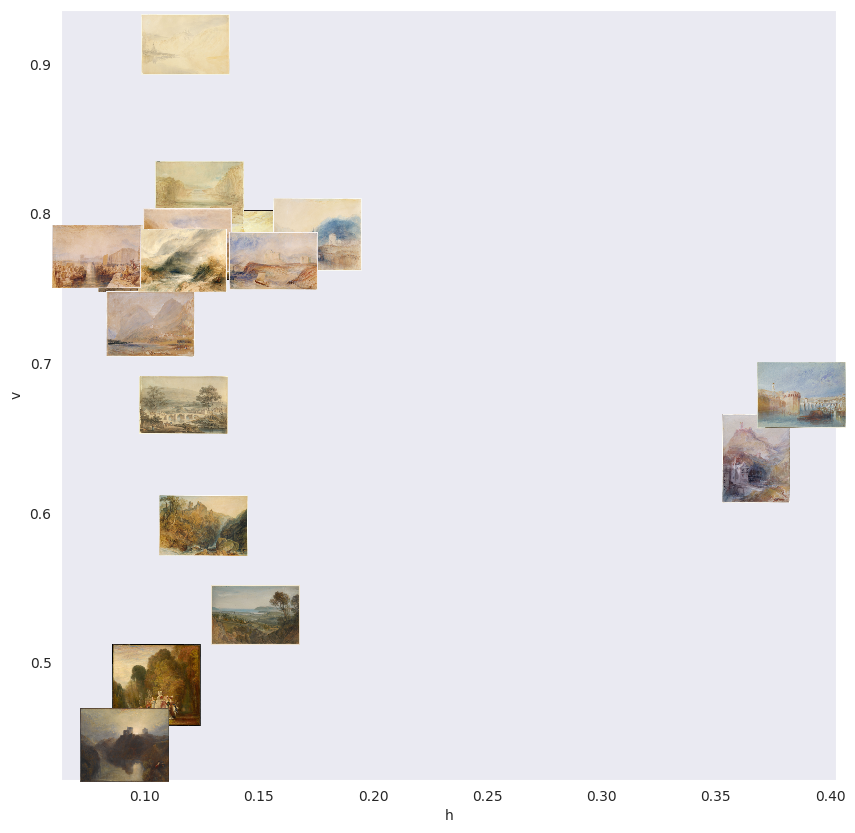

In [11]:
imageplot(IMAGES, 'h', 'v')

### Task 6

1 pt

How many paintings are outliers with respect to hue?

**Answer**

2

### Task 7

1 pt

Call `imageplot`, this time with `IMAGES` sorted by `year` as the first argument, and `year` and `h` as the second argument.

Also, set `figsize` to $20$ by $10$.

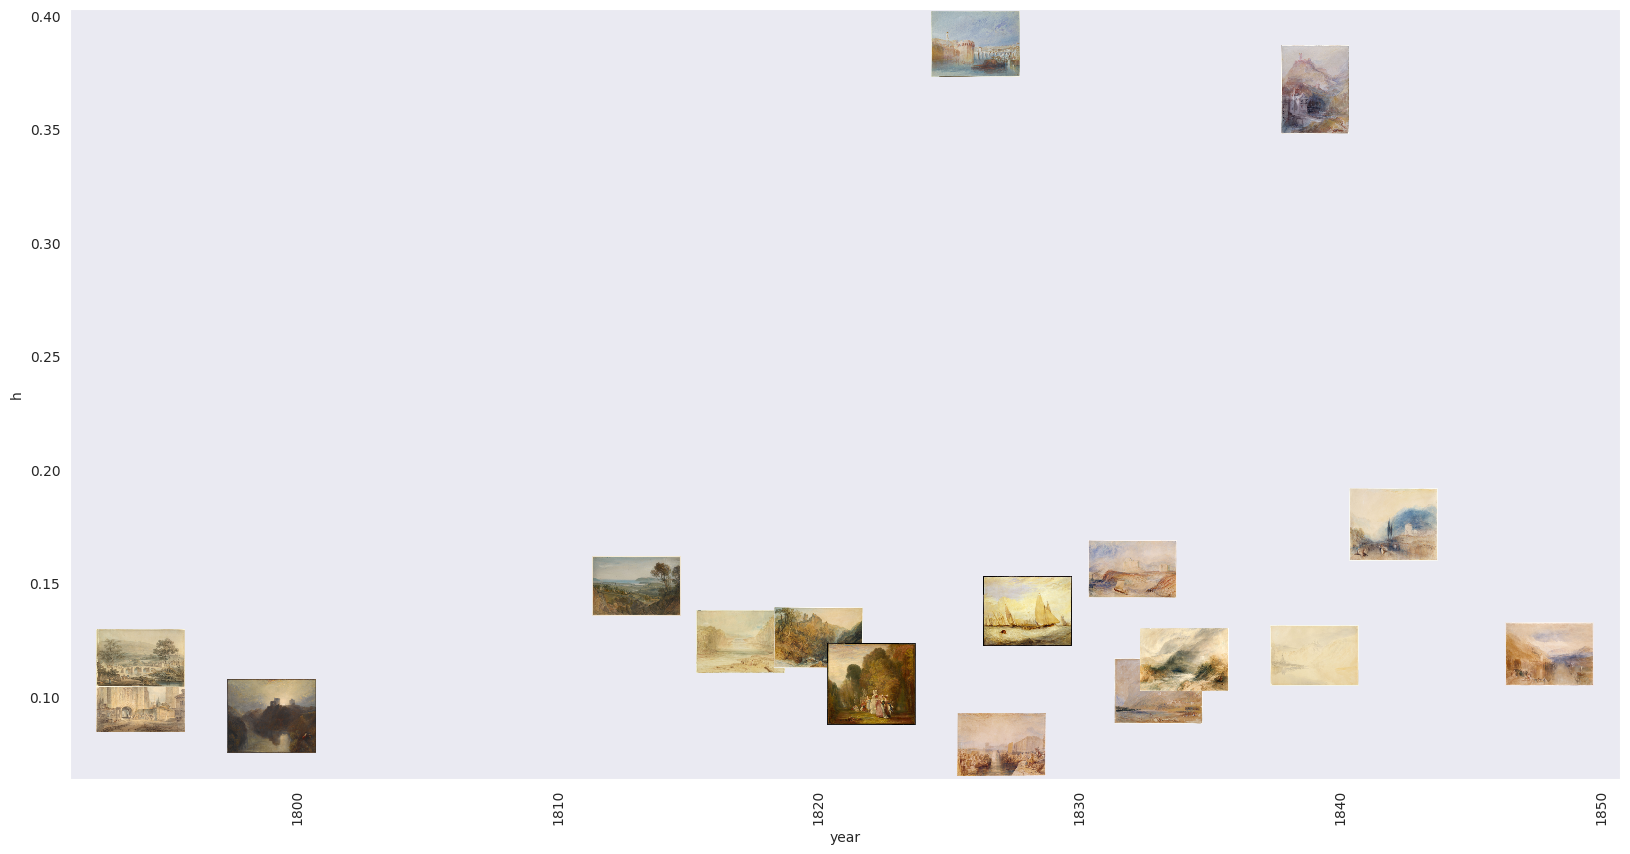

In [12]:
imageplot(IMAGES.sort_values('year'), 'year', 'h', figsize=(20, 10), rot=90)

### Task 8

1 pt

Do the two outliers idenfified in Task 6 appear before or after the historical midpoint ($1820$)?

**Answer**

after

### Task 9

1 pt

Call the function again, this time with `IMAGES` sorted by `year`, and `year` and `v` as your second two arguments.

Resize the figure to the same dimensions specified in Task 7.

Does the plot show a general upward bias for increased brightness over time?

Give your answer in a cell bellow the plot.

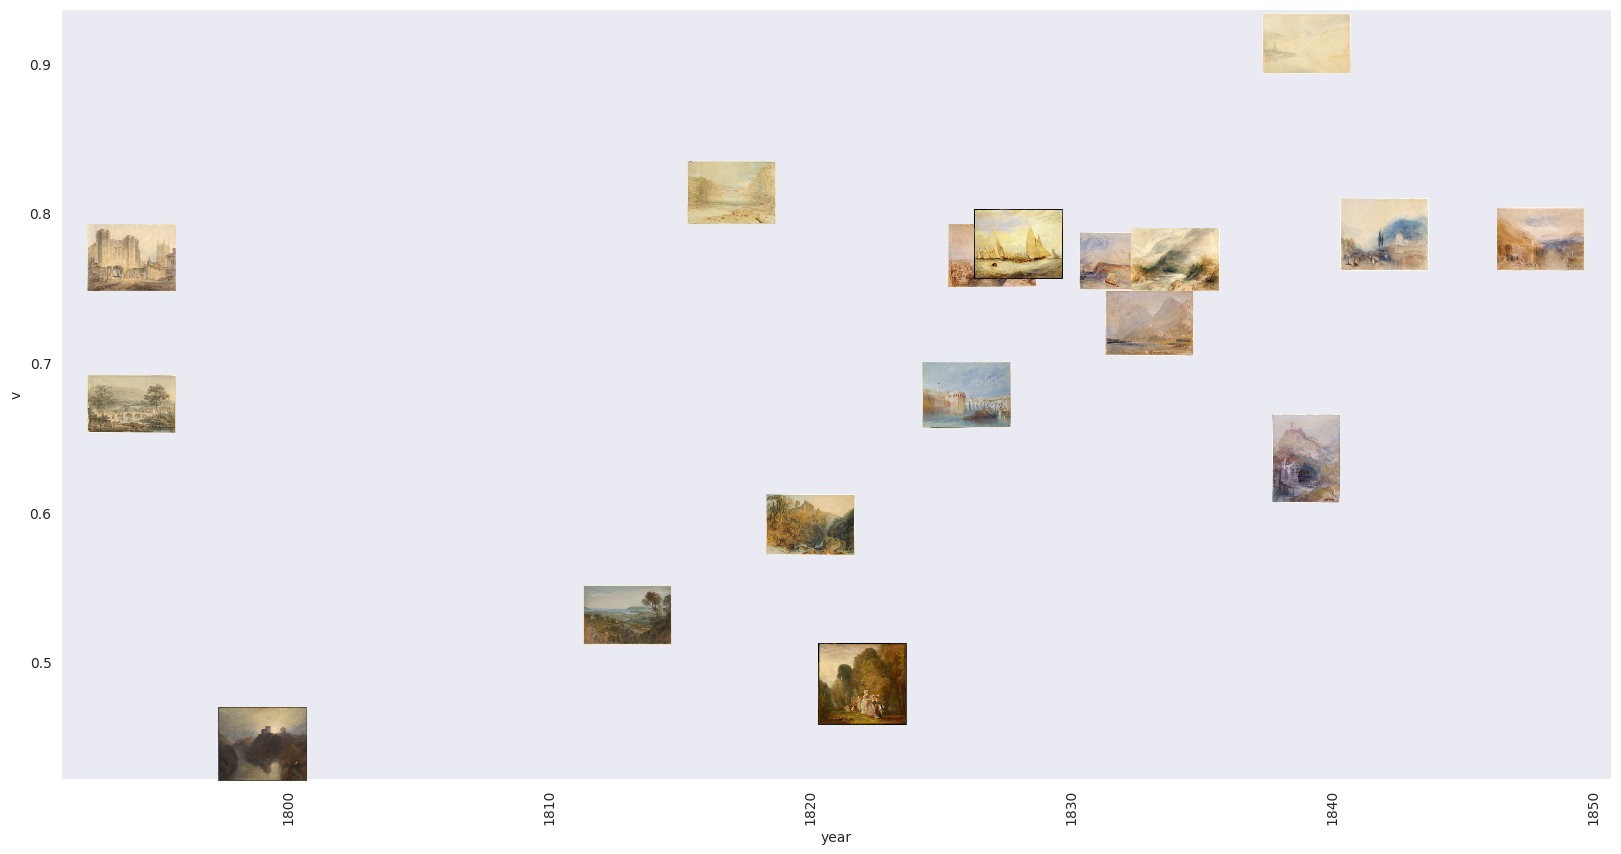

In [13]:
imageplot(IMAGES.sort_values('year'), 'year', 'v', figsize=(20, 10), rot=90)

**Answer**

yes